# Data Structuring

Throughout the following exercises, you will practice structuring data in Python.  Before starting on this programming exercise, we strongly recommend watching the video lecture and completing the IVQ for the associated topics. 

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

As we move forward, you can find instructions on how to install required libraries as they arise in this notebook. Before we begin with the exercises and analyzing the data, we need to import all libraries and extensions required for this programming exercise. Throughout the course, we will be using pandas for operations, and matplotlib and seaborn for plotting.

## Objective 

We will be examining lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for the year of 2018. 

First, we will find the locations with the greatest number of strikes within a single day.  
Then, we will examine the locations that had the greatest number of days with at least one lightning strike.  
Next, we will determine whether certain days of the week had more lightning strikes than others.  
Finally, we will add data from 2016 and 2017 and, for each month, calculate the percentage of total lightning strikes for that year that occurred in that month. We will then plot this data on a bar graph.

In [1]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

In [2]:
# Read in the 2016 data
df = pd.read_csv('eda_structuring_with_python_dataset1.csv') 
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


Just like the data you encountered previously, the dataset has three columns: `date`, `number_of_strikes` and `center_point_geom`. Start by converting the `date` column to datetime. 

In [3]:
# Convert the `date` column to datetime
df['date'] = pd.to_datetime(df['date']) 

Now, let's check the shape of the dataframe. 

In [4]:
df.shape

(3401012, 3)

Let's do a quick check for duplicates. If the shape of the data is different after running this code, we'll know there were duplicate rows.

In [5]:
df.drop_duplicates().shape

(3401012, 3)

The shape of the dataset after dropping duplicates is the same, so we can assume no duplicates. Hence, there is at most one row per date, per area, per number of strikes. 

### Locations with most strikes in a single day

To identify the locations with the most strikes in a single day, sort the `number_of_strikes` column in descending value, or most to least.

In [6]:
# Sort by number of strikes in descending order
df.sort_values(by='number_of_strikes', ascending=False).head(10)

,date,number_of_strikes,center_point_geom
302758,2018-08-20,2211,POINT(-92.5 35.5)
278383,2018-08-16,2142,POINT(-96.1 36.1)
280830,2018-08-17,2061,POINT(-90.2 36.1)
280453,2018-08-17,2031,POINT(-89.9 35.9)
278382,2018-08-16,1902,POINT(-96.2 36.1)
11517,2018-02-10,1899,POINT(-95.5 28.1)
277506,2018-08-16,1878,POINT(-89.7 31.5)
24906,2018-02-25,1833,POINT(-98.7 28.9)
284320,2018-08-17,1767,POINT(-90.1 36)
24825,2018-02-25,1741,POINT(-98 29)


### Locations with most days with at least one lightning strike


To find the number of days that a given geographic location had at least one lightning strike, we'll use the `value_counts()` function on the `center_point_geom` column. The logic is that if each row represents a location-day, then counting the number of times each location occurs in the data will give us the number of days that location had lightning. 

In [8]:
# Identify locations that appear most in the dataset
df.center_point_geom.value_counts()

POINT(-81.5 22.5)     108
POINT(-84.1 22.4)     108
POINT(-82.5 22.9)     107
POINT(-82.7 22.9)     107
POINT(-82.5 22.8)     106
                     ... 
POINT(-119.3 35.1)      1
POINT(-119.3 35)        1
POINT(-119.6 35.6)      1
POINT(-119.4 35.6)      1
POINT(-58.5 45.3)       1
Name: center_point_geom, Length: 170855, dtype: int64

We find that the locations with the most days with lightning strikes had at least one strike on 108 days—nearly one out of every three days of the year. They are all rather close to each other geographically, which makes sense. Notice also that the `value_counts()` function automatically sorts the results in descending order. 

Let's examine whether there is an even distribution of values, or whether 106+ strikes are unusually high value for days with lightning strikes. We'll use the `value_counts()` function again, but this time we'll output the top 20 results. We'll also rename the columns and apply a color gradient.

In [9]:
# Identify top 20 locations with most days of lightning
df.center_point_geom.value_counts()[:20].rename_axis('unique_values').reset_index(name='counts').style.background_gradient()

,unique_values,counts
0,POINT(-81.5 22.5),108
1,POINT(-84.1 22.4),108
2,POINT(-82.5 22.9),107
3,POINT(-82.7 22.9),107
4,POINT(-82.5 22.8),106
5,POINT(-84.2 22.3),106
6,POINT(-76 20.5),105
7,POINT(-75.9 20.4),105
8,POINT(-82.2 22.9),104
9,POINT(-78 18.2),104


###  Lightning strikes by day of week

One useful grouping is categorizing lightning strikes by day of the week, which will tell us whether any particular day of the week had fewer or more lightning strikes than others. To calculate this, we'll take advantage of the fact that the data in our `date` column is of the `datetime` class. Because these entries are datetime objects, we can extract date-related information from them and create new columns.

First, we'll create a column called `week` using `dt.isocalendar()` on the `date` column. This function is designed to be used on a pandas series, and it will return a new dataframe with year, week, and day columns. The information is formatted numerically, so, for example, 3 January 1950 would be respresented as:

| Year | Week | Day |
| ---- | :--: | :-: |
| 1950 | 1    | 3   |

Because we only want to extract the week number, we'll add `.week` to the end. You can learn more about `dt.isocalendar()` in the [dt.isocalendar() pandas documentation](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.dt.isocalendar.html).

We'll also add a `weekday` column using `dt.day_name()`. This is another pandas function designed to be used on a pandas series. It extracts the text name of the day for any given datetime date. You can learn more about this function in the [dt.day_name() pandas documentation](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.dt.day_name.html).


In [11]:
# Create two new columns
df['week'] = df.date.dt.isocalendar().week
df['weekday'] = df.date.dt.day_name()
df.head()

,date,number_of_strikes,center_point_geom,week,weekday
0,2018-01-03,194,POINT(-75 27),1,Wednesday
1,2018-01-03,41,POINT(-78.4 29),1,Wednesday
2,2018-01-03,33,POINT(-73.9 27),1,Wednesday
3,2018-01-03,38,POINT(-73.8 27),1,Wednesday
4,2018-01-03,92,POINT(-79 28),1,Wednesday


Now, we can calculate the mean number of lightning strikes for each weekday of the year. We'll use the `groupby()` function to do this.

In [12]:
# Calculate mean count of lightning strikes for each weekday
df[['weekday','number_of_strikes']].groupby(['weekday']).mean()

,number_of_strikes
weekday,
Friday,13.349972
Monday,13.152804
Saturday,12.732694
Sunday,12.324717
Thursday,13.240594
Tuesday,13.813599
Wednesday,13.224568


Interesting! It seems that Saturday and Sunday has fewer average lightning strikes than the other five weekdays. Let's plot the distributions of the strike counts for each day of the week. We want each distribution to be represented as a boxplot. 

Let's begin by defining the order of the days. We'll begin with Monday and end with Sunday. This is how the days will be ordered in the plot we create.

In [13]:
# Define order of days for the plot
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

Now, we'll code the plot. Remember that `showfliers` is the parameter that controls whether or not outliers are displayed in the plot. If you input `True`, outliers are included; if you input `False`, outliers are left off of the box plot. Keep in mind, we aren’t *deleting* any outliers from the dataset when we create this chart, we are only excluding them from the visualization.


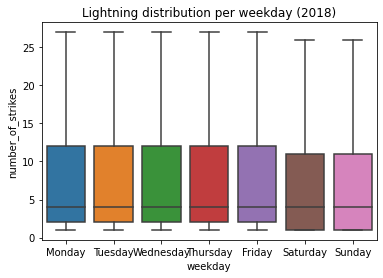

In [14]:
# Create boxplots of strike counts for each day of week
g = sns.boxplot(data=df, 
            x='weekday',
            y='number_of_strikes', 
            order=weekday_order, 
            showfliers=False 
            );
g.set_title('Lightning distribution per weekday (2018)');

Notice that the median remains the same on all of the days of the week. As for Saturday and Sunday, however, the distributions are *both* lower than the rest of the week. We also know that the mean numbers of strikes that occurred on Saturday and Sunday were lower than the other weekdays. Why might this be? Perhaps the aerosol particles emitted by factories and vehicles increase the likelihood of lightning strike. In the U.S., Saturday and Sunday are days that many people don't work, so there may be fewer factories operating and fewer cars on the road. This is only speculation, but it's one possible path for further exploration. 

### Monthly lightning strikes 2016–2018

Finally, we'll examine monthly lightning strike data from 2016–2018. We'll calculate the percentage of total lightning strikes for each year that occurred in a given month. We will then plot this data on a bar graph.

In [15]:
# Import 2016–2017 data
df_2 = pd.read_csv('eda_structuring_with_python_dataset2.csv')
df_2.head()

,date,number_of_strikes,center_point_geom
0,2016-01-04,55,POINT(-83.2 21.1)
1,2016-01-04,33,POINT(-83.1 21.1)
2,2016-01-05,46,POINT(-77.5 22.1)
3,2016-01-05,28,POINT(-76.8 22.3)
4,2016-01-05,28,POINT(-77 22.1)


The data is in the same format as the 2018 data when we first imported it above. Let's convert the `date` column to datetime.

In [16]:
# Convert `date` column to datetime
df_2['date'] = pd.to_datetime(df_2['date'])

Now we can combine the 2016–2017 dataframe with the 2018 dataframe. There are several functions that can do this. We'll use `concat()`. Remember that the 2018 data has two added columns, `week` and `weekday`. To simplify the results of our combined dataframe, we'll drop these added columns during the concatenation. Note that the following code doesn't permanently modify `df`. The columns drop only for this operation. You can learn more about the `concat()` function in the [concat() pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.concat.html).

In [17]:
# Create new dataframe combining 2016–2017 data with 2018 data
union_df = pd.concat([df.drop(['weekday','week'],axis=1), df_2], ignore_index=True)
union_df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


To help us with naming the bars of the bar plot, we'll create three new columns that isolate the year, month number, and month name. 

In [16]:
# add 3 new columns
union_df['year'] = union_df.date.dt.year
union_df['month'] = union_df.date.dt.month
union_df['month_txt'] = union_df.date.dt.month_name()
union_df.head()

,date,number_of_strikes,center_point_geom,year,month,month_txt
0,2018-01-03,194,POINT(-75 27),2018,1,January
1,2018-01-03,41,POINT(-78.4 29),2018,1,January
2,2018-01-03,33,POINT(-73.9 27),2018,1,January
3,2018-01-03,38,POINT(-73.8 27),2018,1,January
4,2018-01-03,92,POINT(-79 28),2018,1,January


Let's check the overall lightning strike count for each year.

In [17]:
# Calculate total number of strikes per year
union_df[['year','number_of_strikes']].groupby(['year']).sum()

,number_of_strikes
year,
2016,41582229
2017,35095195
2018,44600989


Now we'll calculate the percentage of total lightning strikes for each year that occurred in a given month and assign the results to a new dataframe called `lightning_by_month`. 

In [18]:
# Calculate total lightning strikes for each month of each year
lightning_by_month = union_df.groupby(['month_txt','year']).agg(
    number_of_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
    ).reset_index()

lightning_by_month.head()

,month_txt,year,number_of_strikes
0,April,2016,2636427
1,April,2017,3819075
2,April,2018,1524339
3,August,2016,7250442
4,August,2017,6021702


By the way, we can use the `agg()` function to calculate the same yearly totals we found before, with 2017 having fewer strikes than the other two years.

In [19]:
# Calculate total lightning strikes for each year
lightning_by_year = union_df.groupby(['year']).agg(
  year_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
).reset_index()

lightning_by_year.head()

,year,year_strikes
0,2016,41582229
1,2017,35095195
2,2018,44600989


Back to our bar plot... We need to use the monthly totals to calculate percentages. For each month, we'll need the monthly total strike count and the total strike count for that year. Let's create another dataframe called `percentage_lightning` that adds a new column called `year_strikes`, which represents the total number of strikes for each year. We can do this using the `merge()` function. We'll merge the `lightning_by_month` dataframe with the `lightning_by_year` dataframe, specifying to merge on the `year` column. This means that wherever the `year` columns contain the same value in both dataframes, a row is created in our new dataframe with all the other columns from both dataframes being merged. To learn more about this function, refer to the [merge() pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.merge.html).


In [20]:
# Combine `lightning_by_month` and `lightning_by_year` dataframes into single dataframe
percentage_lightning = lightning_by_month.merge(lightning_by_year,on='year')
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes
0,April,2016,2636427,41582229
1,August,2016,7250442,41582229
2,December,2016,316450,41582229
3,February,2016,312676,41582229
4,January,2016,313595,41582229


Now we'll create a new column in our new dataframe that represents the percentage of total lightning strikes for each year that occurred during each month. We do this by dividing the `number_of_strikes` column by the `year_strikes` column and multiplying the result by 100.

In [21]:
# Create new `percentage_lightning_per_month` column
percentage_lightning['percentage_lightning_per_month'] = (percentage_lightning.number_of_strikes/
                                                          percentage_lightning.year_strikes * 100.0)
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes,percentage_lightning_per_month
0,April,2016,2636427,41582229,6.340273
1,August,2016,7250442,41582229,17.436396
2,December,2016,316450,41582229,0.761022
3,February,2016,312676,41582229,0.751946
4,January,2016,313595,41582229,0.754156


Now we can plot the percentages by month in a bar graph! 

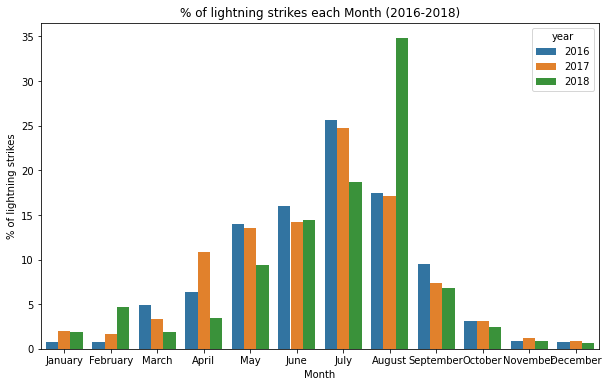

In [22]:
plt.figure(figsize=(10,6));

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

sns.barplot(
    data = percentage_lightning,
    x = 'month_txt',
    y = 'percentage_lightning_per_month',
    hue = 'year',
    order = month_order );
plt.xlabel("Month");
plt.ylabel("% of lightning strikes");
plt.title("% of lightning strikes each Month (2016-2018)");

For all three years, there is a clear pattern over the course of each year. One month stands out. More than 1/3 of the lightning in 2018 happened in August. 

If you have successfully completed the material above, congratulations! You now understand how to structure data in Python and should be able to start using it on your own datasets.